# Bike Usage in Scotland

In this project, we will present our invistigation into some aspects of the dataset. 

Let us import all modules that we will be needing for this project.

## Roads, Authorities, Counting Points
Let us investigate xyz

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from  matplotlib.ticker import FuncFormatter
import folium
import folium.plugins as plugins

Looking at the enormous dft_rawcount_region_id_3.csv file, it is not easy to get an idea of the data. Firstly, let us find how many authorities and roads we have.

In [2]:
df = pd.read_csv('dft_rawcount_region_id_3.csv')
authorities = sorted(df.local_authority_name.unique())
road_names = sorted(df.road_name.unique())
print('We have: ' +str(len(road_names))+' unique roads.') # we have 495 different roads
print('We have: '+str(len(authorities))+' unique authorities.') # we have 32 different authorities


We have: 495 unique roads.
We have: 32 unique authorities.


/Users/lychee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Now, let us find out which local authorities manage the most number of different roads.

The authority managed the most number of roads is: 
 local_authority_name    Highland
road_number                   65
Name: 31, dtype: object


Text(0.5, 1.0, 'The number of roads of different local authorities')

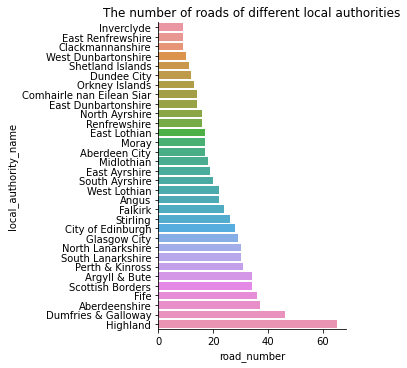

In [3]:
# which local authorities manage the most number of different roads?

#find local authorities and the number of different roads they manage, covert to dataframe
road_managed = df.groupby(by='local_authority_name')['road_name'].nunique().reset_index()
#change the column name
road_managed.rename(columns={'road_name':'road_number'},inplace=True)
#create a new dataframe sorted by road_number
roads_managed = road_managed.sort_values(by=['road_number']).reset_index(drop=True)
#print the authority manages the most number of roads
print('The authority managed the most number of roads is: \n', roads_managed.iloc[-1])
print('The authority that managed the least number of roads is: \n', roads_managed.iloc[0])
r = sns.catplot(data=roads_managed,
                kind='bar',
                x='road_number',
                y='local_authority_name')
plt.title('The number of roads of different local authorities')

Assuming that every link of that road is associated to a counting point in the data, let us find the longest road, that is which road has the most number of different counting points along it.

The five longest roads are: 
     road_name  count_point_number
490       A90                  59
491        A9                  66
492        A8                  76
493         C                 268
494         U                 528


Text(0.5, 1.0, 'The number of counting points of the five longest roads')

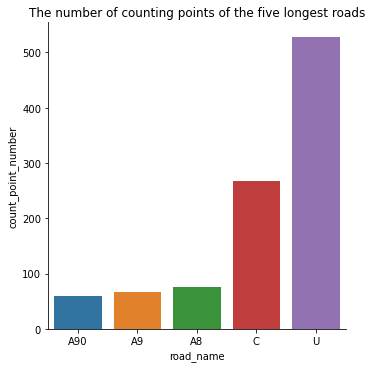

In [4]:
#Which road has the most number of different counting points along it (the longest)?

#find roads and the number of counting points they have, covert to dataframe
cp_road = df.groupby(by='road_name')['count_point_id'].nunique().reset_index()
#change the column name
cp_road.rename(columns={'count_point_id':'count_point_number'},inplace=True)
#create a new dataframe sorted by count_point_number
cps_road = cp_road.sort_values(by=['count_point_number']).reset_index(drop=True)
#print the road has the most number of counting points
print('The five longest roads are: \n', cps_road.iloc[-5:])

c = sns.catplot(data=cps_road.iloc[-5:],
                kind='bar',
                x='road_name',
                y='count_point_number')
plt.title('The number of counting points of the five longest roads')

Now that we investigated different authorities and their corresponsing roads, let us find how many  5 busiest roads on average over the past 20 years, in terms of number of vehicles per day? 


In [5]:
#Excluding C-roads and U-roads, which have been the 5 busiest roads on average over the past 20 years, in terms of number of vehicles per day? 
#Exclude C-roads and U-roads
df1 = df.copy()
df1.drop(df1.index[df1['road_name'] == 'U'], inplace = False)
df1.drop(df1.index[df1['road_name'] == 'C'], inplace = False)
#add a column representing all vehicles
df1['all_vehicles'] = df1['pedal_cycles'] + df1['all_motor_vehicles']
#the average number of all_vehicles on each road
all_v = df1.groupby(by='road_name')['all_vehicles'].mean()
print('In terms of all vehicles, the 5 busiest roads are: \n', all_v.nlargest(5))

In terms of all vehicles, the 5 busiest roads are: 
 road_name
M8      3121.280142
A720    2173.899225
M73     2091.935897
A80     1734.357843
M80     1556.643939
Name: all_vehicles, dtype: float64


In [ ]:

# this is my poor attempt of the heatmap in regard to the vehicle 
# i will delete this if we can't make it work

dfa = bike_v = df1.groupby(by='road_name')['pedal_cycles'].mean()
dfb = motors_v = df1.groupby(by='road_name')['two_wheeled_motor_vehicles'].mean()
dfc = car_taxi_v = df1.groupby(by='road_name')['cars_and_taxis'].mean()
dfd = buses_and_coaches_v = df1.groupby(by='road_name')['buses_and_coaches'].mean()
dfe = light_v = df1.groupby(by='road_name')['lgvs'].mean()
dff = heavy_v = df1.groupby(by='road_name')['all_hgvs'].mean()

all_vehicles_table = [dfa, dfb, dfc, dfd, dfe, dff]
result = pd.concat(all_vehicles_table, axis=1)
pd.pivot_table(result,index=["road_name"])

sns.heatmap(result)

Perhaps, it would be interesting to see if this data changes if we consider one type of vehicle, say pedal cycles.

In [6]:
#the average number of pedal_cycles on each road
bike_v = df1.groupby(by='road_name')['pedal_cycles'].mean()

print('In terms of pedal_cycles, the 5 busiest roads are: \n', bike_v.nlargest(5))

In terms of pedal_cycles, the 5 busiest roads are: 
 road_name
A900     16.108333
A700     15.729167
A9000     9.041667
B853      7.625000
B900      7.425926
Name: pedal_cycles, dtype: float64


Now that we know 5 busiest roads in terms of number of vehicles, let us find the number of bikes used by different authorities per hour.

Text(0.5, 1.0, 'The average use of bikes per hour in different authorities')

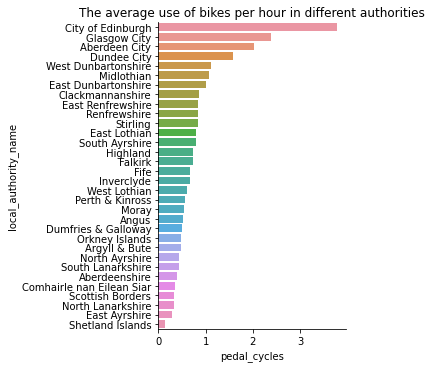

In [7]:
#the number of bikes used by different authorities and 5 authorities use bikes most often.

#the average use of bikes per hour in different authorities
local_bikes = df.pivot_table(index='local_authority_name')['pedal_cycles'].sort_values(ascending=False).reset_index()
b = sns.catplot(data=local_bikes,
                kind='bar',
                x='pedal_cycles',
                y='local_authority_name')
plt.title('The average use of bikes per hour in different authorities')




Considering the graphic above, we can see 5 most popular authorities, where is best to drive bicycles. We can see that City of Edinburgh is by far most popular. Let us have a closer look at the most likely time of the day for people to ride bicycles. 

The most likely time of the day for people to ride in City of Edinburgh is: 
 hour
8    7.266069
Name: pedal_cycles, dtype: float64


Text(0.5, 1.0, 'The average use of bikes each hour in City of Edinburgh')

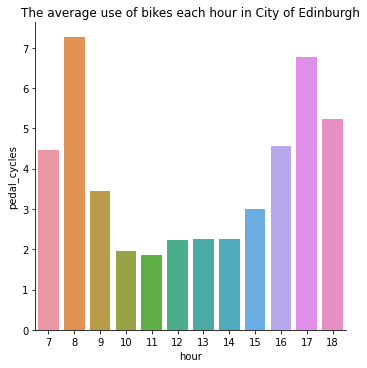

In [8]:
#What is the most likely time of the day for people to ride a bicycle in City of Edinburgh? 

#select City of Edinburgh as a new dataframe
df1 = df.loc[df['local_authority_name'].isin(['City of Edinburgh'])]
#calculate the average pedal_cycles used per hour
bike_time = df1.groupby(by='hour')['pedal_cycles'].mean()
print('The most likely time of the day for people to ride in City of Edinburgh is: \n', bike_time.nlargest(1))

bike_time2 = df1.groupby(by='hour')['pedal_cycles'].mean().reset_index()
b = sns.catplot(data=bike_time2,
                kind='bar',
                x='hour',
                y='pedal_cycles')
plt.title('The average use of bikes each hour in City of Edinburgh')

The advantage of our data set is that we can invesitgate a trend of bike usage over the last 20 years! Let us choose 5 cities where bicycles are most popular. 

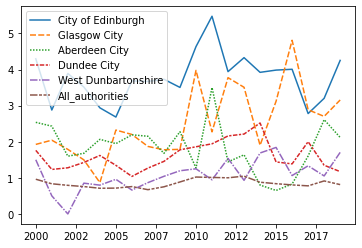

In [9]:
# the trend of bikes usage over the 20 years

#calculate the average number of bicycles used per hour in each authority
bike_usage = df.pivot_table(index='year', columns='local_authority_name', 
                            values='pedal_cycles', aggfunc=np.mean)

#add a column representing the average number of bicycles used per hour in all authorities
bike_usage['All_authorities'] = bike_usage.mean(axis=1)

#get data of the five authorities that love cycling most and the average value of all authorities
auth_bikes = [bike_usage['City of Edinburgh'],bike_usage['Glasgow City'],bike_usage['Aberdeen City'],
              bike_usage['Dundee City'],bike_usage['West Dunbartonshire'],bike_usage['All_authorities']]

#Draw a line chart to display the trend of bikes usage over the 20 years
bs = sns.lineplot(data=auth_bikes)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

In [ ]:
# Followed the method found on https://stackoverflow.com/questions/61483054/folium-heatmap-with-time-for-covid-19
df = pd.read_csv('dft_rawcount_region_id_3.csv')

map_bike_usage = folium.Map(location=[55, 2], tiles= "cartodbpositron",zoom_start=6)

# Normalize values to be in (0,1]
df['pedal_cycles'] = df['pedal_cycles'] / df['pedal_cycles'].sum()

#Ensuring we are handling floats
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

bike_df = df[['latitude', 'longitude','pedal_cycles']]

# Let us pre-process the data
df['year'] = df['year'].sort_values(ascending=True)
data = []
for _, d in df.groupby('year'):
    data.append([[row['latitude'], row['longitude'], row['pedal_cycles']] for _, row in d.iterrows()])

# Let us input function
hm = plugins.HeatMapWithTime(data, auto_play=True,max_opacity=0.8)
hm.add_to(map_bike_usage)
map_bike_usage

